# 1. data

In [57]:
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score

import seaborn as sns

In [61]:
metadata=pd.read_csv("covid.csv")
metadata.head(3)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/3/31,0,0,0,0,0,negative,No,male,Other
1,2020/3/31,0,0,0,0,0,negative,No,female,Other
2,2020/3/31,0,0,0,0,0,negative,No,male,Other


In [62]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53843 non-null  object
 2   fever                53843 non-null  object
 3   sore_throat          53843 non-null  int64 
 4   shortness_of_breath  53843 non-null  int64 
 5   head_ache            53843 non-null  int64 
 6   corona_result        53843 non-null  object
 7   age_60_and_above     53843 non-null  object
 8   gender               53843 non-null  object
 9   test_indication      53843 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.1+ MB


In [63]:
metadata['cough']=metadata['cough'].replace(to_replace='None',value=np.nan)
metadata['fever']=metadata['fever'].replace('None',np.nan)
metadata['sore_throat']=metadata['sore_throat'].replace('None',np.nan)
metadata['shortness_of_breath']=metadata['shortness_of_breath'].replace('None',np.nan)
metadata['head_ache']=metadata['head_ache'].replace('None',np.nan)
metadata['gender']=metadata['gender'].replace(['female', 'male', 'None'], [0, 1, np.nan])
metadata['age_60_and_above']=metadata['age_60_and_above'].replace(['None', 'No', 'Yes'], [np.nan, 0 ,1])
metadata['test_indication']=metadata['test_indication'].replace(['Contact with confirmed', 'Other', 'Abroad'], [1, 0, 2])
metadata['corona_result']=metadata['corona_result'].replace(['negative', 'positive', 'other'], [0, 1, 2])

metadata

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/3/31,0,0,0,0,0,0,0,1.0,0
1,2020/3/31,0,0,0,0,0,0,0,0.0,0
2,2020/3/31,0,0,0,0,0,0,0,1.0,0
3,2020/3/31,0,0,0,0,0,1,0,0.0,0
4,2020/3/31,1,0,0,0,0,0,0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
53838,2020/3/22,1,1,0,0,0,0,1,0.0,2
53839,2020/3/22,1,1,1,0,1,0,0,0.0,2
53840,2020/3/22,1,0,0,0,0,0,0,0.0,2
53841,2020/3/22,1,0,0,0,0,0,0,1.0,0


In [64]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            53843 non-null  object 
 1   cough                53827 non-null  object 
 2   fever                53826 non-null  object 
 3   sore_throat          53843 non-null  int64  
 4   shortness_of_breath  53843 non-null  int64  
 5   head_ache            53843 non-null  int64  
 6   corona_result        53843 non-null  int64  
 7   age_60_and_above     53843 non-null  int64  
 8   gender               52649 non-null  float64
 9   test_indication      53843 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [65]:
metadata["cough"] = pd.to_numeric(metadata["cough"])
metadata["fever"] = pd.to_numeric(metadata["fever"])

In [66]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            53843 non-null  object 
 1   cough                53827 non-null  float64
 2   fever                53826 non-null  float64
 3   sore_throat          53843 non-null  int64  
 4   shortness_of_breath  53843 non-null  int64  
 5   head_ache            53843 non-null  int64  
 6   corona_result        53843 non-null  int64  
 7   age_60_and_above     53843 non-null  int64  
 8   gender               52649 non-null  float64
 9   test_indication      53843 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 4.1+ MB


In [67]:
metadata["cough"]=metadata["cough"].astype('Int64')
metadata["fever"]=metadata["fever"].astype('Int64')
metadata['sore_throat']=metadata['sore_throat'].astype('Int64')
metadata['shortness_of_breath']=metadata['shortness_of_breath'].astype('Int64')
metadata['head_ache']=metadata['head_ache'].astype('Int64')
metadata['gender']=metadata['gender'].astype('Int64')
metadata['age_60_and_above']=metadata['age_60_and_above'].astype('Int64')
metadata['test_indication']=metadata['test_indication'].astype('Int64')
metadata['corona_result']=metadata['corona_result'].astype('Int64')

In [68]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53843 entries, 0 to 53842
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            53843 non-null  object
 1   cough                53827 non-null  Int64 
 2   fever                53826 non-null  Int64 
 3   sore_throat          53843 non-null  Int64 
 4   shortness_of_breath  53843 non-null  Int64 
 5   head_ache            53843 non-null  Int64 
 6   corona_result        53843 non-null  Int64 
 7   age_60_and_above     53843 non-null  Int64 
 8   gender               52649 non-null  Int64 
 9   test_indication      53843 non-null  Int64 
dtypes: Int64(9), object(1)
memory usage: 4.6+ MB


In [69]:
df=metadata.copy()
df.dropna(inplace=True)
df.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [70]:
# 移除 class 與 日期
X=df.drop(labels=["test_date", "corona_result"], axis=1).values
y=df["corona_result"]

# 2. KMeans

In [71]:
random_state=2022

In [72]:
kmeans_list = [KMeans(n_clusters=k, random_state=random_state).fit(X)
                for k in range(1, 30)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:]]

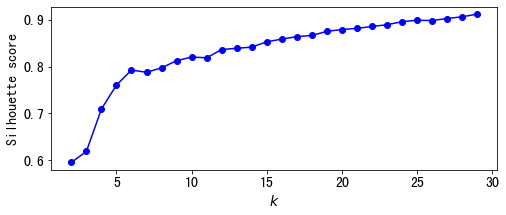

In [73]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 30), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [74]:
inertias = [model.inertia_ for model in kmeans_list]
inertias

[53369.275725794425,
 31865.928929711634,
 20492.769490864506,
 16341.219291670302,
 14601.067993712048,
 12102.099435182354,
 10637.821631338997,
 9848.424824859938,
 8900.902997531517,
 8417.480329757092,
 8083.033394316422,
 7336.322111240494,
 6937.336095980592,
 6596.045800736656,
 6102.4959981147895,
 5924.996181458756,
 5628.839027116808,
 5326.06554417955,
 5065.414893733537,
 4851.94905072491,
 4639.551253823035,
 4457.522077378909,
 4287.007796811196,
 4052.217764641235,
 3906.653898589033,
 3825.57862586862,
 3726.988823051178,
 3562.4582745610805,
 3361.719527997161]

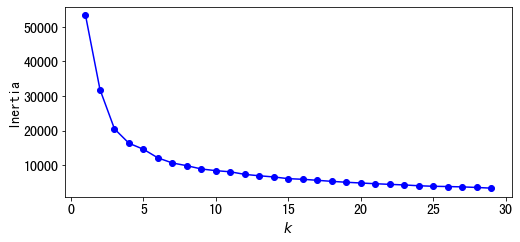

In [75]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(3, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
# plt.axis([1, 8.5, 0, 1300])

plt.show()

In [76]:
# KMeans 演算法
kmeans = KMeans(n_clusters = 5, random_state=random_state)
clusters_pred = kmeans.fit_predict(X)

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [77]:
kmeans.inertia_

14601.067993712048

查看各cluster的中心，並在圖上畫出

In [78]:
kmeans.cluster_centers_

array([[ 5.09641873e-02,  2.97418631e-02,  7.70329558e-03,
         5.10152025e-03,  1.04581165e-02,  2.16493490e-15,
         2.83106871e-15,  1.98959290e-02],
       [ 5.35611038e-02,  3.92115637e-02,  7.09592641e-03,
         5.78186597e-03,  1.20893561e-02,  1.94289029e-15,
         1.00000000e+00,  2.23390276e-02],
       [ 7.73426374e-01,  4.15835944e-01,  6.73597266e-02,
         5.19794930e-02,  9.64112788e-02,  1.16206209e-01,
         5.25918542e-01,  1.71219026e+00],
       [ 7.70552850e-02,  8.82268691e-02,  8.30707534e-03,
         1.17444858e-02,  1.26038384e-02,  1.00000000e+00,
         1.00000000e+00,  3.20824979e-02],
       [ 8.13287514e-02,  6.04238259e-02,  8.59106529e-03,
         1.00229095e-02,  1.00229095e-02,  1.00000000e+00,
        -9.99200722e-16,  3.89461627e-02]])

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


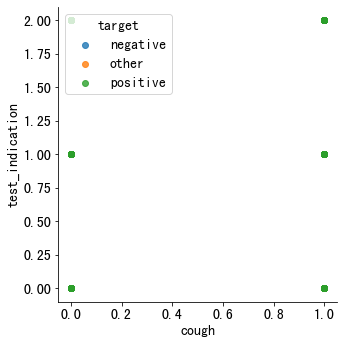

In [79]:
sns.lmplot("cough", "test_indication", hue='corona_result', data=df, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['negative', 'other', 'positive'])
plt.show()

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


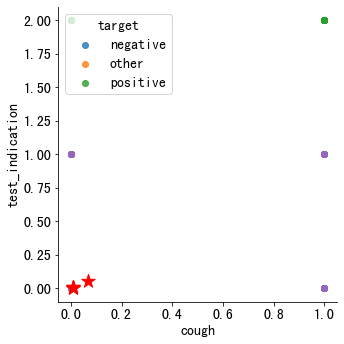

In [80]:
df['Predict']=clusters_pred
sns.lmplot("cough", "test_indication", data=df, hue="Predict", fit_reg=False, legend=False)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=200,c="r",marker='*')
plt.legend(title='target', loc='upper left', labels=['negative', 'other', 'positive'])
plt.show()